### Question 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')

In [3]:
X, y = mnist['data'], mnist['target']
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.15,
    stratify=y,
    random_state=100
)

In [6]:
X_test.shape

(10500, 784)

In [7]:
pd.Series(y_train).value_counts()

1    6695
7    6199
3    6070
2    5942
9    5914
0    5868
6    5845
8    5801
4    5800
5    5366
dtype: int64

In [8]:
pd.Series(y_test).value_counts().sort_values()

5     947
4    1024
8    1024
6    1031
0    1035
9    1044
2    1048
3    1071
7    1094
1    1182
dtype: int64

In [9]:
some_digit_image = X_train[45000].reshape(28, 28)

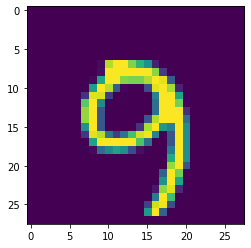

In [10]:
plt.imshow(some_digit_image)
plt.show()

In [11]:
y_train[45000]

'9'

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [13]:
knn = KNeighborsClassifier().fit(X_train, y_train)

In [14]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [15]:
knn.predict(X_train[45000].reshape(1,-1))

array(['9'], dtype=object)

In [16]:
y_train_preds = knn.predict(X_train[:10000])
#y_train_preds = knn.predict(X_train)

In [17]:
print(classification_report(y_train[:10000], y_train_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       998
           1       0.97      1.00      0.98      1079
           2       0.99      0.98      0.98      1023
           3       0.98      0.98      0.98       997
           4       0.99      0.98      0.98      1021
           5       0.98      0.98      0.98       881
           6       0.99      0.99      0.99       991
           7       0.98      0.98      0.98      1063
           8       1.00      0.96      0.98       962
           9       0.97      0.97      0.97       985

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [18]:
knn_cv = cross_val_score(KNeighborsClassifier(n_jobs=-1), X_train[:10000], y_train[:10000], cv=10)

In [20]:
knn_cv

array([0.94831014, 0.93419741, 0.9500998 , 0.946     , 0.952     ,
       0.94094094, 0.95095095, 0.94388778, 0.95285858, 0.93674699])

In [87]:
param_grid = {
    'n_neighbors': [10, 20, 30, 40, 50],
    'weights': ['uniform', 'distance']
}

In [17]:
grid_knn = GridSearchCV(
    KNeighborsClassifier(), 
    param_grid, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=10, 
    verbose=1
).fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 93.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 214.1min finished


In [23]:
grid_knn.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance')

In [21]:
grid_knn.best_params_

{'n_neighbors': 10, 'weights': 'distance'}

In [22]:
grid_knn.best_score_

0.9700672268907563

In [24]:
y_test_preds = grid_knn.best_estimator_.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_preds)

0.9706666666666667

### Question 2

In [16]:
from scipy.ndimage.interpolation import shift

In [17]:
X_train.shape

(59500, 784)

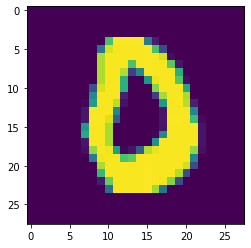

In [18]:
plt.imshow(X_train[0,:].reshape(28,28))
plt.show()

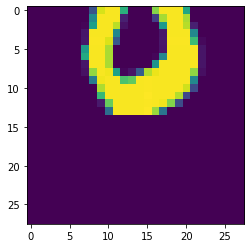

In [19]:
plt.imshow(shift(X_train[0,:].reshape(28,28), [-10,0]))
plt.show()

1. For each row of X_train:
    1. Reshape row to 28,28
    2. For each direction (up, down, left, right):
        1. reshape to 784,0
        2. write to empty array

In [41]:
def shift_and_append(X, n):
    x_arr = np.zeros((1, 784))
    for i in range(n):
        for j in range(-1,2):
            for k in range(-1,2):
                if j!=k and j!=-k:
                    x_arr = np.append(x_arr, shift(X[i,:].reshape(28,28), [j, k]).reshape(1, 784), axis=0)
    return np.append(X, x_arr[1:,:], axis=0)

In [77]:
def shift_four(X):
    X = X.reshape(-1, 28, 28)
    right = np.roll(X, 1, axis=2) 
    left = np.roll(X, -1, axis=2)
    up = np.roll(X, -1, axis=1)
    down = np.roll(X, 1, axis=1)
    arr = np.concatenate((X, right, left, up, down), axis=0)
    arr = arr.reshape(-1, 784)
    return arr

In [85]:
%%time
X_train_new = shift_four(X_train)
y_train_new = np.concatenate((y_train, y_train, y_train, y_train, y_train), axis=0)

Wall time: 1.45 s


In [ ]:
print(X_train_new.shape)
print(y_train_new.shape)

In [ ]:
knn_new = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='distance').fit(X_train_new, y_train_new)